In [ ]:
import numpy as np
import pandas as pd

In [ ]:
construction = pd.read_csv("https://richardson.byu.edu/220/construction.csv")
construction.head(5)

,ProjectSize,NumberOfWorkers,ClimateCondition,ProjectComplexity,FundingType,CompanyExperience,EquipmentRating,SupplyChainEfficiency,TimeToComplete
0,3100,11,Wet_Cold,2,Private,22,90,6,177
1,3000,48,Wet_Cold,6,Private,16,90,6,184
2,2700,60,Temperate,9,Public,15,80,3,192
3,1900,69,Dry_Hot,2,Private,11,80,4,181
4,2850,33,Dry_Hot,5,Private,9,80,6,187


In [ ]:
statistical_summary = construction.describe()
data_types = construction.dtypes
print(data_types)
print('ClimateCondition vales:' ,construction['ClimateCondition'].unique())
print('FundingType vales:' ,construction['FundingType'].unique())
statistical_summary

ProjectSize               int64
NumberOfWorkers           int64
ClimateCondition         object
ProjectComplexity         int64
FundingType              object
CompanyExperience         int64
EquipmentRating           int64
SupplyChainEfficiency     int64
TimeToComplete            int64
dtype: object
ClimateCondition vales: ['Wet_Cold' 'Temperate' 'Dry_Hot' 'Wet_Hot' 'Dry_Cold']
FundingType vales: ['Private' 'Public']


,ProjectSize,NumberOfWorkers,ProjectComplexity,CompanyExperience,EquipmentRating,SupplyChainEfficiency,TimeToComplete
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,4919.778189,41.735675,4.090573,19.835490,80.018484,4.624769,196.214418
std,2021.025305,23.027407,2.254445,13.709848,12.597752,2.038894,27.279457
min,1500.000000,10.000000,1.000000,0.000000,50.000000,1.000000,157.000000
25%,3050.000000,23.000000,2.000000,10.000000,70.000000,3.000000,180.000000
50%,4950.000000,37.000000,4.000000,17.000000,80.000000,5.000000,191.000000
75%,6550.000000,58.000000,5.000000,26.000000,90.000000,6.000000,204.000000
max,9500.000000,100.000000,10.000000,101.000000,100.000000,10.000000,425.000000


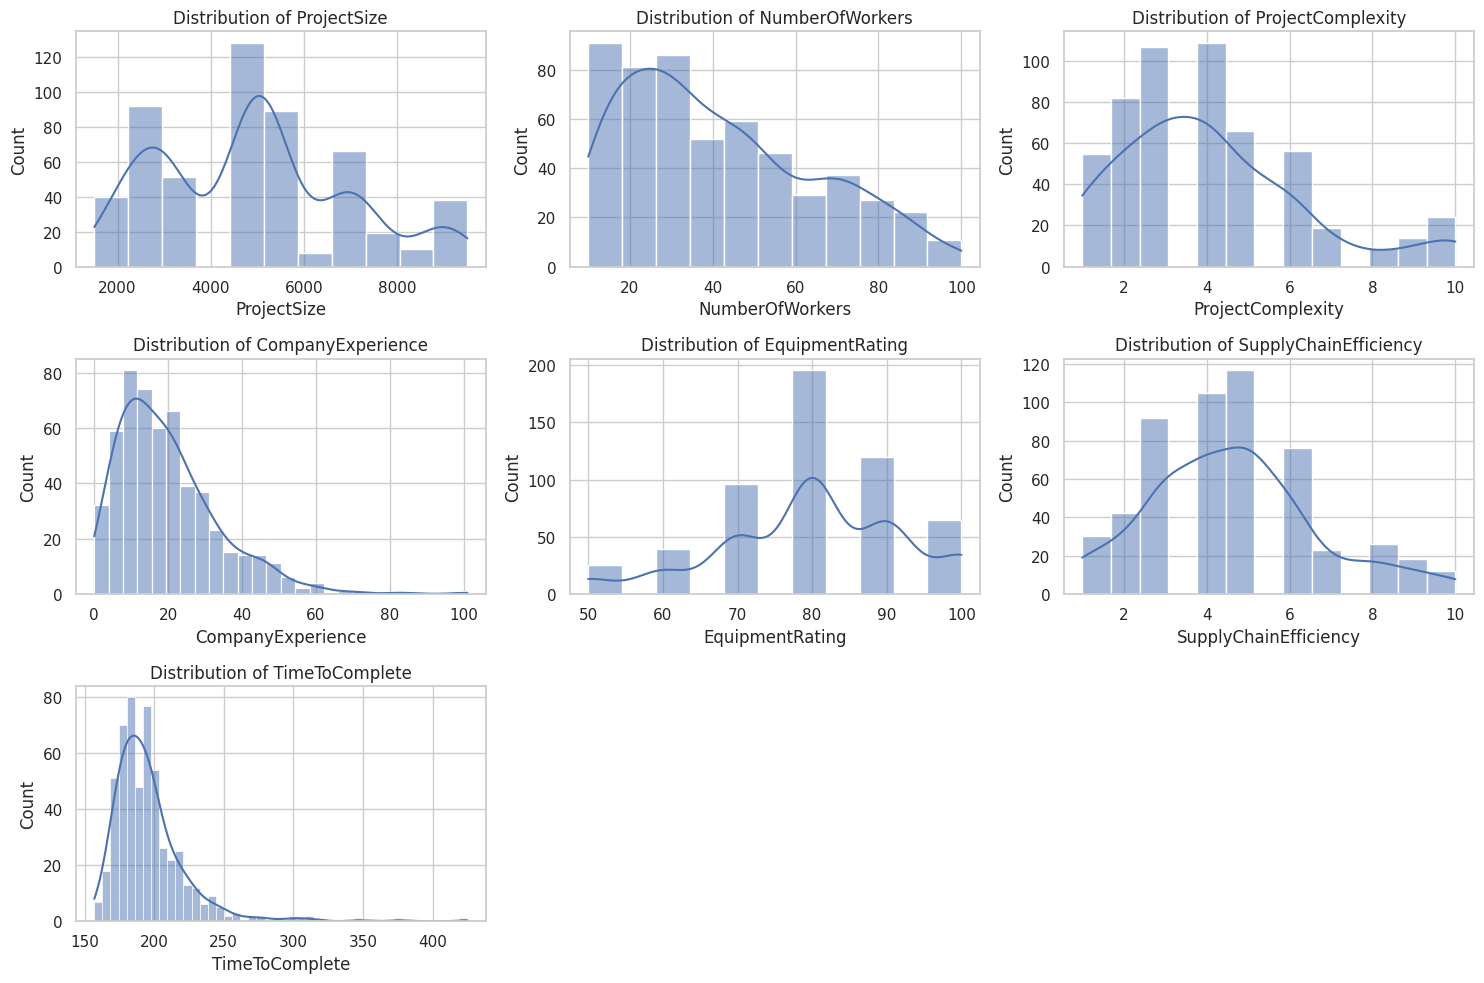

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

numeric_columns = ['ProjectSize', 'NumberOfWorkers', 'ProjectComplexity',
                   'CompanyExperience', 'EquipmentRating', 'SupplyChainEfficiency', 'TimeToComplete']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(construction[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

**Balancing Accuracy with Interpretability**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_var = ['ClimateCondition', 'FundingType']
encoded_data = pd.get_dummies(construction, columns=cat_var, drop_first=True)

X = encoded_data.drop(columns = ['TimeToComplete'])
y = construction['TimeToComplete']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(312.731892743893, 0.3588945583742682)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

key_predictors = ['ProjectSize', 'NumberOfWorkers', 'ProjectComplexity', 'CompanyExperience']

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
key_predictors_interactions = poly.fit_transform(X[key_predictors])

interaction_df = pd.DataFrame(key_predictors_interactions, columns=poly.get_feature_names_out(key_predictors))

X_refined = encoded_data.drop(key_predictors + ['TimeToComplete'], axis=1)
X_refined = pd.concat([X_refined, interaction_df], axis=1)

X_train_refined, X_test_refined, y_train_refined, y_test_refined = train_test_split(X_refined, y, test_size=0.2, random_state=42)

linear_model_refined = LinearRegression()
linear_model_refined.fit(X_train_refined, y_train_refined)

y_pred_refined = linear_model_refined.predict(X_test_refined)

mse_refined = mean_squared_error(y_test_refined, y_pred_refined)
r2_refined = r2_score(y_test_refined, y_pred_refined)

mse_refined, r2_refined


(260.66496551506634, 0.4656326018857694)

**Discussion**
- the model complexity increased because we added poly functions but this allowed us to add more relationships between the variables and get a better MSE and R^2 scores.

- model Interpretability: by focusing of key predictors and more important interactions we get a better model that is more easier to understand. even though these variables ar emore complex the are easy to understand and relate their relationship to the target varibale.

- trade off: the new model is more accurate and has betetr results while still being relatively easy to understand and have a good interpretability. this new model has a better balance between accuracy and interpretability without being very complex

In [ ]:
new_data = pd.read_csv('https://richardson.byu.edu/220/construction_new.csv')
new_data.to_csv('new_data.csv')

In [ ]:
new_data_encoded = pd.get_dummies(new_data, columns=cat_var, drop_first=True)

new_data_interactions = poly.transform(new_data_encoded[key_predictors])
new_interaction_df = pd.DataFrame(new_data_interactions, columns=poly.get_feature_names_out(key_predictors))

X_refined_new = new_data_encoded.drop(key_predictors + ['TimeToComplete'], axis=1)
X_new_aligned = X_refined_new.reindex(columns = X_train_refined.columns, fill_value=0)
y_new_pred = linear_model_refined.predict(X_new_aligned)
predicted_timelines_new = pd.DataFrame(y_new_pred, columns=['Predicted TimeToComplete'])
predicted_timelines_new.head()

,Predicted TimeToComplete
0,171.18643


In [ ]:
from scipy import stats
import numpy as np
from scipy.stats import t

rse = np.sqrt(mse_refined)
n = X_train_refined.shape[0]
p =  X_train_refined.shape[1] + 1
x_mean = X_train_refined.mean()
df = n - p
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = t.ppf(1 - alpha/2, df)

sum_squared_diff = np.sum((X_train_refined - x_mean) ** 2).sum()
squared_diff_new_data = np.sum((X_new_aligned - x_mean) ** 2).sum()

se_prediction = rse * np.sqrt(1 + 1/n + squared_diff_new_data / sum_squared_diff)
margin_of_error = t_critical * se_prediction

lower_bound = y_new_pred - margin_of_error
upper_bound = y_new_pred + margin_of_error

print("Predicted value:", y_new_pred)
print("Confidence interval for the individual prediction:", lower_bound, upper_bound)


Predicted value: [171.18643023]
Confidence interval for the individual prediction: [139.34763344] [203.02522702]


- The model estimates a total of 172 days for the project to be completed. this can be used as a guideline for planning the project.
- due to uncertainty the 95% confidence range of expected days is between 140 and 204 days. we are 95 perceent sure the project will be done in under 204 days and will take 140 days minimum
- the construction estimators should use this range to allow for potential delays in the project. it is important for project managers and risk estimaters to know the range because in construction things might get delyed for many reasons

### Report
**Overview:** <br>
 The final model is a refined linear regression model incorportating key predictor and their interaction terms. The predictors include Project Size, Number of Workers, Project Complexity, and Company Expereince. To capture the naunced relationships between these factors, interaction terms were used. <br>

**How the final model achieves a balance between accuracy and interpretability:**<br>
1. Accuracy: The model includes interaction terms which significantly imporoved its predictive accuracy compared to the intitial version. <br>
2. Interpretability: The complexity increased but the model remained interpretable. The predictors are intutive and match the overall knowledge of the industry, which makes the model clear to project managers and estimators. <br>

**Justification of model choices with respect to this balance:** <br>
key predictors are chosen based on their relevance to project timelines as understood in the consturction industry to make sure that the output is in line with practical experience and expectations. <br>
Interaction terms acknowledge that project duration is not just a sum of independent factors, but more a result of their combined and interrelated effects. <br>
Linear Regression Framework is used because it is simple and interpretable, which is essential for making informed decisions and explaining the basis of predictions to stakeholders. <br>

**Insights and actionable recommendations derived from the model:**<br>
Project Timeline Estimation: The average number of days to to complete the project is 172 days. <br>
Confidence Interval: The range of days that provides a 95% confidence is (140-204 days) This takes into account possible delays. <br>
These predictions and intervals should be used to build trust with clients and to set expectations. <br>







